imread のパスに日本語を指定すると正しくパスを取得できなくなる模様。

In [1]:
import os
import cv2

#img_path_name = "sample_100knocks\サンプルコード_20200325\9章\img\img01.jpg" # 対象画像の名前
img_path_name = "img01.jpg" # 対象画像の名前
bace = os.path.dirname(os.path.abspath("__file__")) # 実行ファイルのディレクトリ名
target_path = os.path.join(bace, img_path_name) # パスの連結

#img = cv2.imread(target_path)
img = cv2.imread(img_path_name)

height, width = img.shape[:2]
print("画像幅: " + str(width))
print("画像高さ: " + str(height))
cv2.imshow("img",img)
cv2.waitKey(0)

画像幅: 1920
画像高さ: 1440


-1

In [4]:
import cv2

cap = cv2.VideoCapture("mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

print("画像幅:"+str(width))
print("画像高さ:"+str(height))
print("総フレーム数:"+str(count))
print("FPS:"+str(fps))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

画像幅:1920.0
画像高さ:1440.0
総フレーム数:401.0
FPS:30.0
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


KeyboardInterrupt: 

In [1]:
import cv2

cap = cv2.VideoCapture("mov01.avi")
num = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
        filepath = "snapshot/snapshot_"+str(num)+".jpg"
        cv2.imwrite(filepath, frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    num += 1
cap.release()
cv2.destroyAllWindows()

In [4]:
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride": (8, 8), "padding": (32, 32), "scale": 1.05, "hitThreshold": 0, "finalThreshold": 5}

img = cv2.imread("img01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
cv2.imshow("img", img)
cv2.waitKey(0)

-1

In [1]:
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("img02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(10, 10))

for (x, y, w, h) in face_list:
    color = (0, 0, 225)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness=pen_w)
cv2.imshow("img", img)
cv2.imwrite("temp.jpg", img)
cv2.waitKey(0)

-1

In [2]:
import cv2
import dlib
import math

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)

for k, d in enumerate(dets):
    shape = predictor(img, d)

    color_f = (0, 0, 255)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)
    
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        
        if shape_point_count<num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in
            
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r, (0, 0, 255), line_w)
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r, (0, 0, 255), line_w)
    
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("顔方位:{}(角度:{}度)".format(theta, radian))
    
    if radian<0:
        textPrefix = "    left "
    else:
        textPrefix = "   right "
    textShow = textPrefix + str(round(abs(radian), 1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)
    
cv2.imshow("img", img)
cv2.imwrite("temp.jpg", img)
cv2.waitKey()

ModuleNotFoundError: No module named 'dlib'

In [2]:
import cv2
cap = cv2.VideoCapture("mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride":(8, 8), "padding":(32, 32), "scale": 1.05, "hitThreshold":0, "finalThreshold":5}

movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video = cv2.VideoWriter(movie_name, fourcc, 30, (width, height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (255,255,255), 3)
            video.write(frame)
    else:
        break
    
    num += 1
video.release()
cap.release()
cv2.destroyAllWindows()
print("タイムラプス生成終了")

タイムラプス生成終了


In [7]:
import cv2
import pandas as pd

print("分析開始")

cap = cv2.VideoCapture("mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride": (8, 8), "padding": (32, 32), "scale":1.05, "hitThreshold":0, "finalThreshold":5}

num = 0
list_df = pd.DataFrame( columns = ["time", "people"])
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if(len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps, len(human) ], index=list_df.columns )
            list_df = list_df.append( tmp_se, ignore_index=True )
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
    else:
        break
    num += 1
cap.release()
cv2.destroyAllWindows()
print("分析終了")

分析開始
分析終了


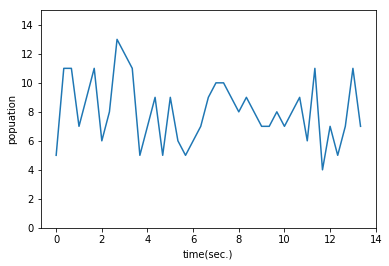

In [9]:
import matplotlib.pyplot as plt
plt.plot(list_df["time"], list_df["people"])
plt.xlabel("time(sec.)")
plt.ylabel("popuation")
plt.ylim(0,15)
plt.show()

分析開始
分析終了


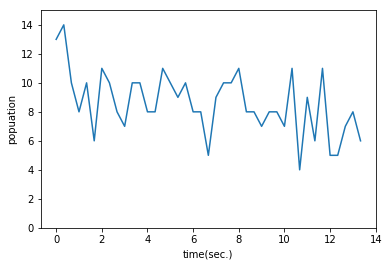

In [10]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

print("分析開始")

cap = cv2.VideoCapture("mov02.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride": (8, 8), "padding": (32, 32), "scale":1.05, "hitThreshold":0, "finalThreshold":5}

num = 0
list_df = pd.DataFrame( columns = ["time", "people"])
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if(len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x+w, y+h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps, len(human) ], index=list_df.columns )
            list_df = list_df.append( tmp_se, ignore_index=True )
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
    else:
        break
    num += 1
cap.release()
cv2.destroyAllWindows()
print("分析終了")

plt.plot(list_df["time"], list_df["people"])
plt.xlabel("time(sec.)")
plt.ylabel("popuation")
plt.ylim(0,15)
plt.show()

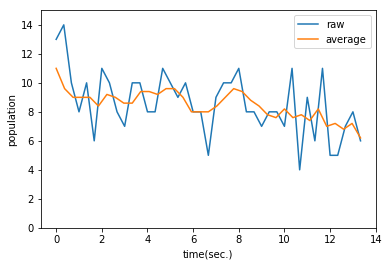

In [12]:
import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode="valid")
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x, ma_y = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x, ma_y, label="average")
plt.xlabel("time(sec.)")
plt.ylabel("population")
plt.ylim(0,15)
plt.legend()
plt.show()
